In [2]:
! pip install pmdarima

     |████████████████████████████████| 1.5MB 7.6MB/s 
     |████████████████████████████████| 9.5MB 16.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
#from nsepy import get_history
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('ICICI-STOCK-PRICE.csv')

In [3]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,05 May 2020,348.00,348.30,329.65,330.85,339.344547,2240054,26060,760150109,1039435,46.40,18.65,-17.15
1,06 May 2020,330.00,345.40,325.30,341.40,338.507886,1305155,20080,441805260,201539,15.44,20.10,11.40
2,07 May 2020,337.95,342.85,334.10,336.75,338.334641,742760,10625,251301438,132263,17.81,8.75,-1.20
3,08 May 2020,344.00,352.50,333.75,337.75,346.449948,1558394,18566,539905520,593687,38.10,18.75,-6.25
4,11 May 2020,344.90,344.90,318.15,320.10,328.428786,3216480,47120,1056384623,1129432,35.11,26.75,-24.80


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       252 non-null    object 
 1   Open Price                 252 non-null    float64
 2   High Price                 252 non-null    float64
 3   Low Price                  252 non-null    float64
 4   Close Price                252 non-null    float64
 5   WAP                        252 non-null    float64
 6   No.of Shares               252 non-null    int64  
 7   No. of Trades              252 non-null    int64  
 8   Total Turnover (Rs.)       252 non-null    int64  
 9   Deliverable Quantity       252 non-null    int64  
 10  % Deli. Qty to Traded Qty  252 non-null    float64
 11  Spread High-Low            252 non-null    float64
 12  Spread Close-Open          252 non-null    float64
dtypes: float64(8), int64(4), object(1)
memory usage: 2

In [ ]:
df.shape

(252, 13)

In [5]:
from datetime import datetime

In [54]:
from datetime import timedelta

In [6]:
icici_stock_close = df[['Date','Close Price']]

In [7]:
icici_stock_close .head()

,Date,Close Price
0,05 May 2020,330.85
1,06 May 2020,341.40
2,07 May 2020,336.75
3,08 May 2020,337.75
4,11 May 2020,320.10


In [8]:
icici_stock_close['Date'] = pd.to_datetime(icici_stock_close['Date'])
icici_stock_close.set_index('Date',inplace=True)

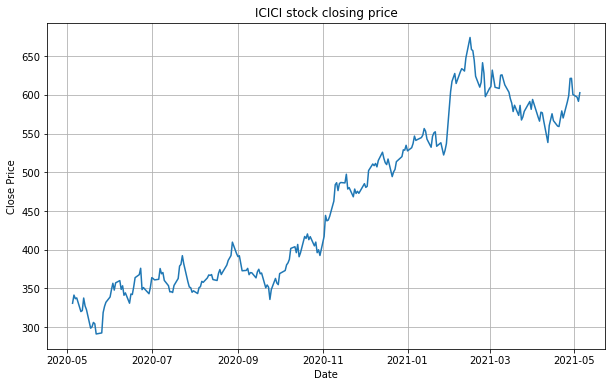

In [9]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(icici_stock_close['Close Price'])
plt.title('ICICI stock closing price')
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
adf_test(icici_stock_close,'ICICI-stock-close-price')

Augmented Dickey-Fuller Test: ICICI-stock-close-price
ADF test statistic       -0.735413
p-value                   0.837362
# lags used               0.000000
# observations          251.000000
critical value (1%)      -3.456674
critical value (5%)      -2.873125
critical value (10%)     -2.572944
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data is non-stationary


In [ ]:
auto_arima(icici_stock_close,seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -970.278
Date:                Thu, 13 May 2021   AIC                           1944.557
Time:                        12:02:50   BIC                           1951.608
Sample:                             0   HQIC                          1947.394
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0829      0.750      1.444      0.149      -0.387       2.552
sigma2       133.4098      7.350     18.150      0.000     119.003     147.816
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               144.70
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               2.35   Skew:                             0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.tools import diff

In [ ]:
icici_stock_close['close_price First Difference'] = diff(icici_stock_close,k_diff=1)

In [ ]:

# Equivalent to:
#df['Inventories First Difference'] = df['Inventories'] - df['Inventories'].shift(1)
adf_test(icici_stock_close['close_price First Difference'] ,'Real Manufacturing and Trade Inventories')

Augmented Dickey-Fuller Test: Real Manufacturing and Trade Inventories
ADF test statistic     -1.051906e+01
p-value                 9.790498e-19
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data is stationary


we could see that first order differencing was enough to make data stationary

In [10]:
icici_stock_close.shape

(252, 1)

In [16]:
train1 = icici_stock_close[:232]

In [17]:
len(train1)

232

In [18]:
test1= icici_stock_close[232:]

In [19]:
len(test1)

20

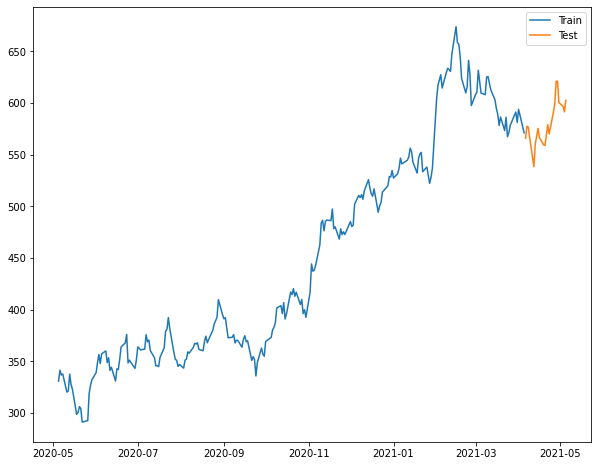

In [107]:
plt.figure(figsize=(10,8))
plt.plot(train1, label= 'Train')
plt.plot(test1 , label='Test')
plt.legend(loc ='Left corner')
plt.show()

In [108]:
arima_model = auto_arima(train1,start_p=0,d=1,start_q=0,
                         max_p=1,max_d=1, max_q=1 ,
                        start_P=0,D=1,start_Q=0,m=12, 
                         seasonal=True,error_action='warn', trace=True,
                         suppress_warnings=True, stepwise=True, 
                         random_state=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1836.011, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1774.948, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1837.298, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1761.967, Time=0.41 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1729.712, Time=2.96 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1727.712, Time=0.79 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=2.05 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1727.710, Time=1.04 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1725.713, Time=0.74 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1726.967, Time=1.58 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1725.716, Time=0.41 sec
 ARIMA(0,1,1)(0,1,2)[12]             : 

In [114]:
ARIMA = arima_model.fit(icici_stock_close)

In [110]:
dates_f = pd.date_range(start='2021-05-05', end='2021-05-20')
dates_f

DatetimeIndex(['2021-05-05', '2021-05-06', '2021-05-07', '2021-05-08',
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20'],
              dtype='datetime64[ns]', freq='D')

In [111]:
values = np.random.random(len(dates_f))

In [88]:
test_df= pd.DataFrame({'Prediction of stock privce': values}, index=dates_f)

In [115]:
forecast = ARIMA.predict(n_periods=len(dates_f),typ='levels')
forecast

array([602.90672361, 600.61763992, 605.94212856, 601.59115149,
       598.15837404, 598.90527482, 604.38890623, 608.50498137,
       604.24992735, 609.1096077 , 611.17702654, 611.91369833,
       611.77218546, 609.55288911, 615.82263048, 611.10028031])

In [116]:
forecast = pd.DataFrame(forecast, index = dates_f,columns=['Prediction of stock privce'])

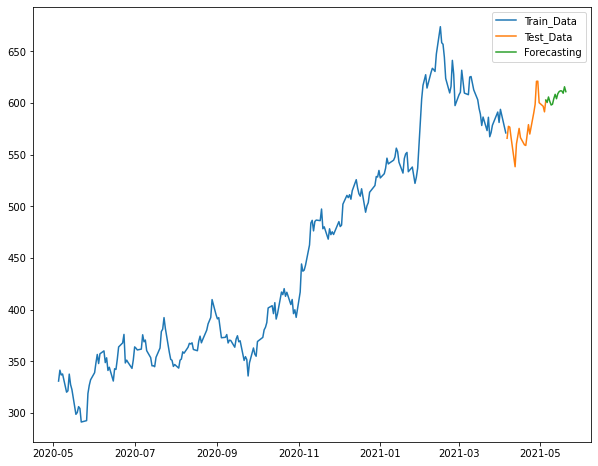

In [117]:
plt.figure(figsize=(10,8))
plt.plot(train1, label='Train_Data')

plt.plot(test1, label='Test_Data')

plt.plot(forecast, label='Forecasting')
plt.legend(loc ='Left corner')
plt.show()

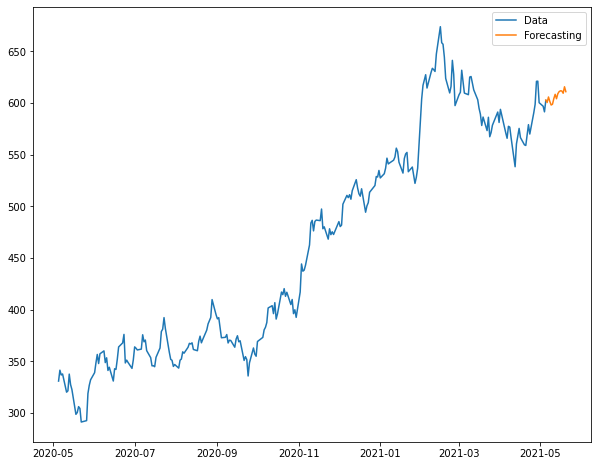

In [118]:
plt.figure(figsize=(10,8))
plt.plot(icici_stock_close, label= 'Data')
plt.plot(forecast, label='Forecasting')
plt.legend(loc ='Left corner')
plt.show()

In [119]:
# create a pickle file to save the model
import pickle
pickle.dump(ARIMA, open("ARIMA-Model-TSF.pkl", "wb"))

In [120]:
!ls

ARIMA-Model-TSF.pkl  ICICI-STOCK-PRICE.csv  sample_data


In [121]:
ARIMA_Model = pickle.load(open("ARIMA-Model-TSF.pkl", "rb"))

In [123]:
pred_frcst1 = ARIMA_Model.predict(n_periods=len(dates_f), typ='levels')


In [124]:
forecast1 = pd.DataFrame(pred_frcst1, index = dates_f,columns=['Prediction of stock privce'])

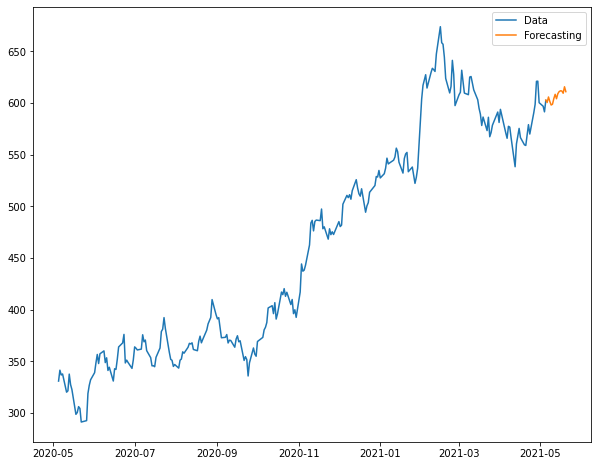

In [126]:
plt.figure(figsize=(10,8))
plt.plot(icici_stock_close, label= 'Data')
plt.plot(forecast1, label='Forecasting')
plt.legend(loc ='Left corner')
plt.show()